In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing libraries
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import cv2
import os


In [3]:
#parameters
path = "Train"    #folder with all the class folders
label_file = "Train.csv"
batch_size = 30 #how many to process together
epochs_val = 50
image_dimesion = (32,32,3) # 3 is for RGB
test_ratio = 0.2 # 20% of images for testing ad 80% for training
validatio_ratio = 0.2 # 20% of remaiing training data for validation

In [4]:
count = 0
images = []
classNo = []
image_size = (32,32)  # Set your desired height and width so that images are of same dimension and can be easily converted to numpy array.
mylist = os.listdir(path)
print("Total classes detected: ", len(mylist))
print("Importing classes.....")
for class_idx, class_name in enumerate(mylist):
    mypiclist = os.listdir(os.path.join(path, class_name))
    for pic_name in mypiclist:
        img_path = os.path.join(path, class_name, pic_name)
        curImg = cv2.imread(img_path)
        if curImg is not None:
            # Resize the image to a fixed size
            curImg = cv2.resize(curImg, image_size)
            images.append(curImg)
            classNo.append(class_idx)
        else:
            print(f"Error: Unable to load image {img_path}")
    print(class_idx, end=" ")
print(" ")
#Covert Lists to NumPy arrays
images = np.array(images)
classNo = np.array(classNo)


Total classes detected:  43
Importing classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [5]:
# Check if the Number of images and their corresponding labels are equal or not
print("Data shapes: ")
print(images.shape,classNo.shape)

Data shapes: 
(39209, 32, 32, 3) (39209,)


In [6]:
#split data
X_train,X_test,Y_train,Y_test = train_test_split(images,classNo)

In [7]:
print("Train: ",end = " ");print(X_train.shape,Y_train.shape)
print("Test: ",end = " ");print(X_test.shape,Y_test.shape)

Train:  (29406, 32, 32, 3) (29406,)
Test:  (9803, 32, 32, 3) (9803,)


In [8]:
#Convert classNo(labels) to onehot encoding
Y_train = to_categorical(Y_train,43) #It converts categorical variable as a binary vector
Y_test = to_categorical(Y_test,43)

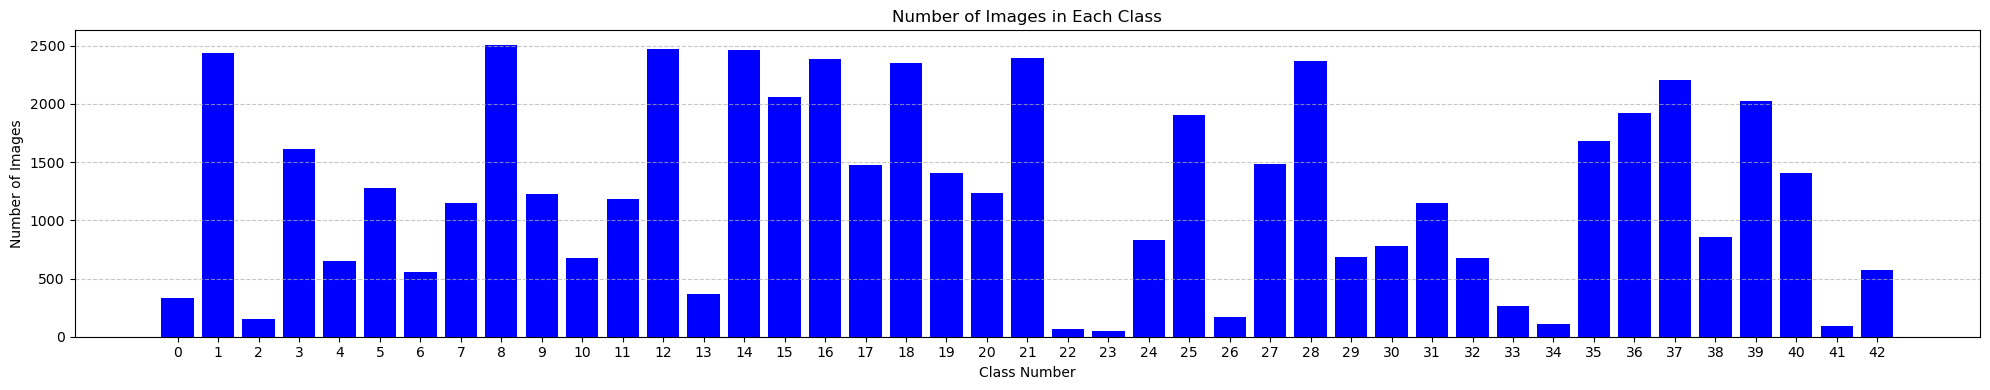

In [9]:
num_classes = len(mylist)
class_no = np.random.randint(0,2600,size = num_classes )

plt.figure(figsize=(20,4))
plt.bar(range(num_classes), class_no, color='blue')
plt.xlabel('Class Number')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(range(num_classes))  # Set x-axis ticks to class numbers
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()
plt.show()

In [10]:
# Image preprocessing
def preprocess_images(image_paths):
    preprocessed_images = []
    for image_paths_per_class in image_paths:
        for img_path in image_paths_per_class:
            # read the image
            img = cv2.imread(img_path)
            # resize image to a standard size
            img = cv2.resize(img, (32, 32))
            # convert to grayscale
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # normalize pixel value to range in [0,1]
            img_normalized = img_gray / 255.0
            preprocessed_images.append(img_normalized)
    return np.array(preprocessed_images)

print('done')

done


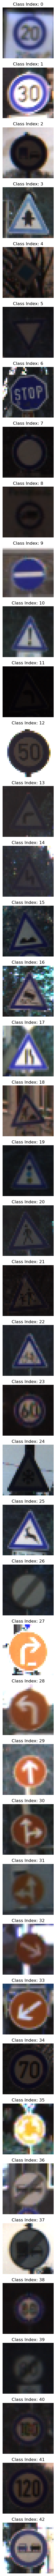

In [11]:
# Display sample images from each class

sample_num_per_class = 1         # Number of images to display from each class
plt.figure(figsize=(100, 100))            # Initialize figure to display sample image
classes = len(mylist)

# Loop through each class
for class_idx in range(classes):
    # Get indices of images belonging to current class
    class_indices = np.where(Y_train[:, class_idx] == 1)[0]
    # Randomly choose sample images from the class
    sample_indices = np.random.choice(class_indices, sample_num_per_class, replace=False)

    # Loop through the selected sample images
    for i, idx in enumerate(sample_indices):
        # Get image corresponding to the index
        sample_img = X_train[idx]

        # Plot the image
        plt.subplot(classes, sample_num_per_class, class_idx * sample_num_per_class + i + 1)
        plt.imshow(sample_img)
        plt.title(f"Class Index: {class_idx}")
        plt.axis("off")

# Adjust layout and display figure
plt.tight_layout()
plt.show()


In [12]:
# Define the CNN model architecture
Mymodel = Sequential()

# Add the first convolutional layer
Mymodel.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_dimesion))

# Add a max pooling layer
Mymodel.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
Mymodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add a max pooling layer
Mymodel.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
Mymodel.add(Flatten())

# Add a fully connected layer
Mymodel.add(Dense(128, activation='relu'))

# Add dropout layer to reduce overfitting
Mymodel.add(Dropout(0.5))

# Add the output layer
Mymodel.add(Dense(num_classes, activation='softmax'))

# Compile the model
Mymodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
Mymodel.summary()


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
hstry = Mymodel.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs_val, validation_data=(X_test, Y_test))

Epoch 1/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.0494 - loss: 5.1971 - val_accuracy: 0.0554 - val_loss: 3.5555
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.0552 - loss: 3.5318 - val_accuracy: 0.0554 - val_loss: 3.5061
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.0569 - loss: 3.4905 - val_accuracy: 0.0553 - val_loss: 3.4953
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.0539 - loss: 3.4886 - val_accuracy: 0.0577 - val_loss: 3.4926
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.0562 - loss: 3.4848 - val_accuracy: 0.0553 - val_loss: 3.4919
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.0557 - loss: 3.4883 - val_accuracy: 0.0577 - val_loss: 3.4917
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.0562 - loss: 3.4781 - val_accuracy: 0.0577 - val_loss: 3.4916
Epoch 8/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.0583 - loss: 3.4833 - 

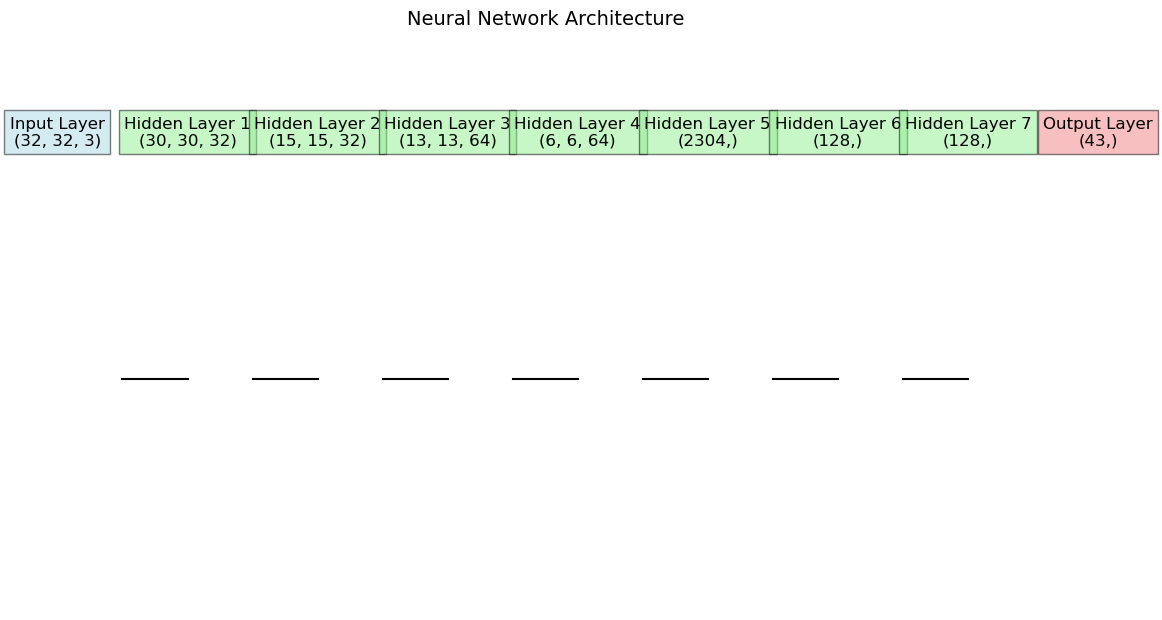

In [14]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
import tensorflow as tf

def plot_model_architecture(model):
    # Create a new figure
    plt.figure(figsize=(12, 6))
    
    # Set initial position for the first layer
    x_position = 0.5
    
    # Add input layer
    input_shape = model.input_shape[1:]
    plt.text(x_position, 0.9, f'Input Layer\n{input_shape}', ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    
    # Initialize a list to store the output shapes of each layer
    layer_outputs = []
    
    # Loop through each layer in the model
    for layer in model.layers:
        # Apply the layer to some input data to get the output shape
        dummy_input = tf.zeros((1,) + input_shape)
        output_shape = layer(dummy_input).shape[1:]
        # Append the output shape to the list
        layer_outputs.append(output_shape)
        input_shape = output_shape
    
    # Set the maximum width for the plot
    max_width = 10
    
    # Calculate the width of each layer
    layer_width = min(max_width / len(layer_outputs), 1)
    
    # Add hidden layers and connections between layers
    for i, output_shape in enumerate(layer_outputs[:-1], start=1):
        # Calculate the position of the layer
        x_position += layer_width
        # Add text for the layer
        plt.text(x_position, 0.9, f'Hidden Layer {i}\n{output_shape}', ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
        # Add connection between layers
        plt.plot([x_position - layer_width / 2, x_position], [0.85, 0.85], color='black')
    
    # Add output layer
    output_shape = layer_outputs[-1]
    x_position += layer_width
    plt.text(x_position, 0.9, f'Output Layer\n{output_shape}', ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightcoral', alpha=0.5))
    
    # Hide axes
    plt.axis('off')
    
    # Set title
    plt.title('Neural Network Architecture', fontsize=14,y=1.25)
    
    # Show plot
    plt.show()

# Plot the model architecture
plot_model_architecture(Mymodel)

In [17]:
# Model evaluation on train set of the data

loss = Mymodel.evaluate(X_train,Y_train)
print("Train loss: ",loss)
accuracy = Mymodel.evaluate(X_train,Y_train)
print("Train accuracy: ",accuracy)

919/919 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0560 - loss: 3.4880
Train loss:  [3.483642578125, 0.057063184678554535]
919/919 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0560 - loss: 3.4880
Train accuracy:  [3.483642578125, 0.057063184678554535]


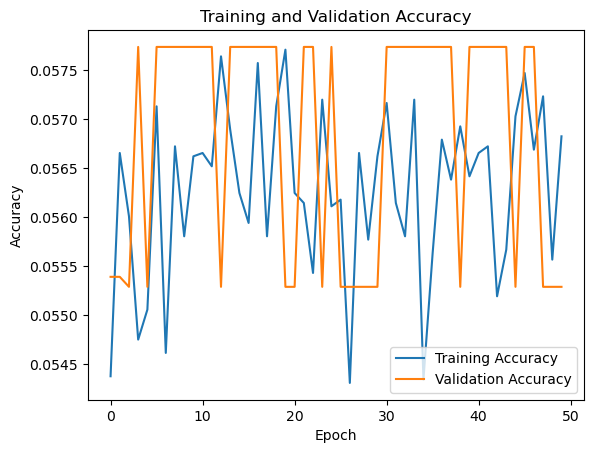

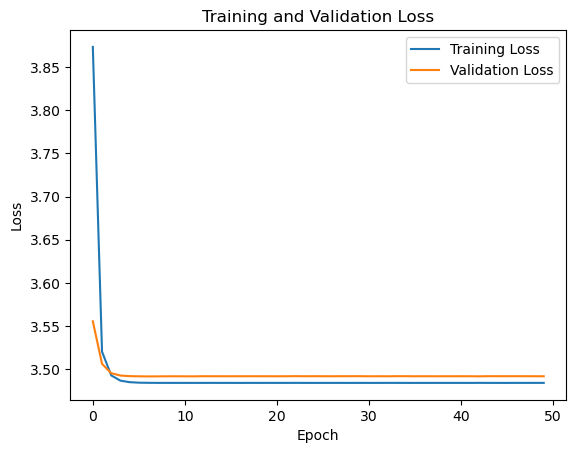

In [18]:
# Plot training and validation accuracy

plt.plot(hstry.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(hstry.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()  # Adding legend to differentiate lines
plt.show()

# Training and validation Loss 
plt.plot(hstry.history['loss'], label='Training Loss')  # Training loss
plt.plot(hstry.history['val_loss'], label='Validation Loss')  # Validation loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()  # Adding legend to differentiate lines
plt.show()


In [19]:
# Model evaluation on test set of the data
loss = Mymodel.evaluate(X_test,Y_test)
print("Test loss: ",loss)
accuracy = Mymodel.evaluate(X_test,Y_test)
print("Test accuracy: ",accuracy)

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0520 - loss: 3.5017
Test loss:  [3.491771936416626, 0.05528919771313667]
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0520 - loss: 3.5017
Test accuracy:  [3.491771936416626, 0.05528919771313667]


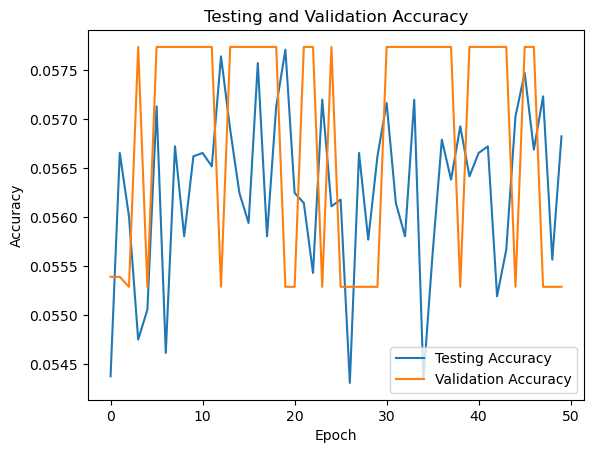

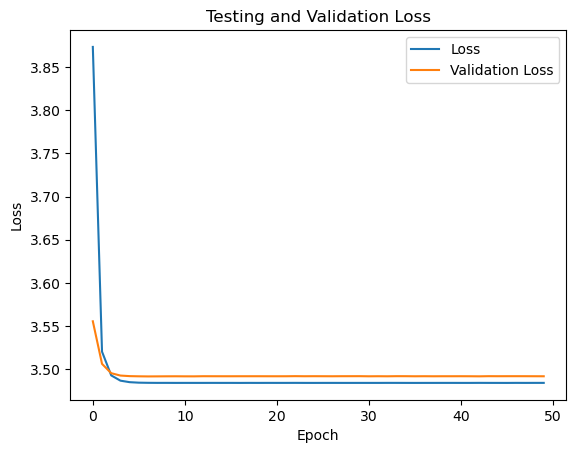

In [20]:
# Plot testing and validation accuracy

plt.plot(hstry.history['accuracy'], label='Testing Accuracy')  # Training accuracy
plt.plot(hstry.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Testing and Validation Accuracy')
plt.legend()  # Adding legend to differentiate lines
plt.show()

# Plot testing and validation Loss 
plt.plot(hstry.history['loss'], label='Loss')  # Training loss
plt.plot(hstry.history['val_loss'], label='Validation Loss')  # Validation loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing and Validation Loss')
plt.legend()  # Adding legend to differentiate lines
plt.show()


In [21]:
from sklearn.metrics import roc_curve,auc,confusion_matrix

307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


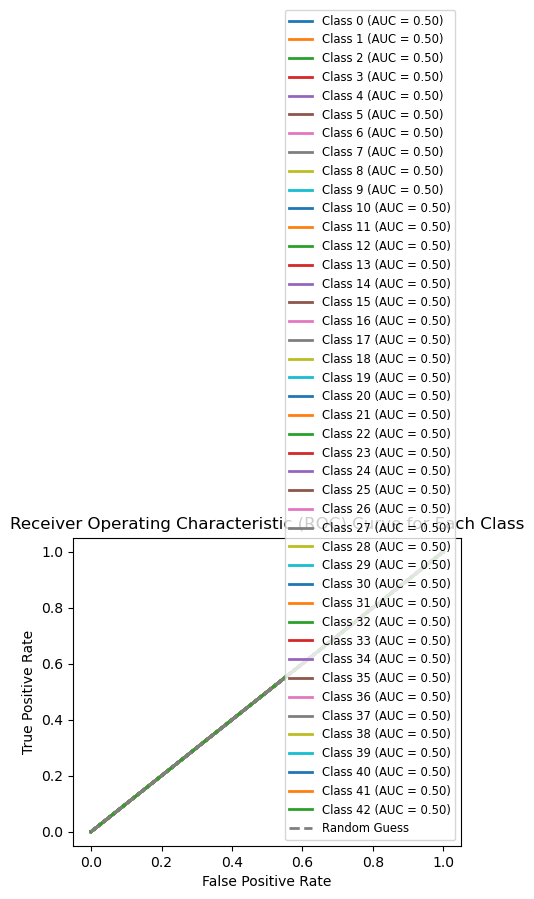

In [22]:
# Predict probabilities for each class on test data
y_pred_prob = Mymodel.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 4))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc="lower right", fontsize='small')  # Adjust legend position and font size
plt.show()

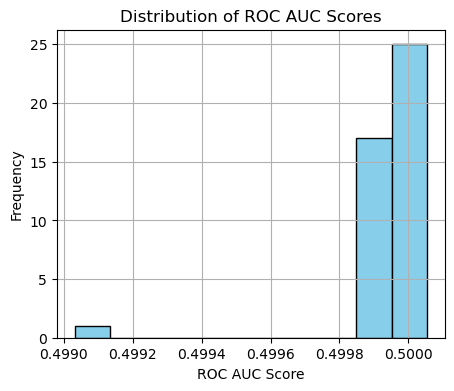

In [23]:
# Compute ROC curve and ROC area for each class
roc_auc_values = [roc_auc[i] for i in range(num_classes)]

# Plot histogram of ROC AUC scores
plt.figure(figsize=(5, 4))
plt.hist(roc_auc_values, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('ROC AUC Score')
plt.ylabel('Frequency')
plt.title('Distribution of ROC AUC Scores')
plt.grid(True)
plt.show()

In [24]:
# Predict classes for test data
y_pred = np.argmax(Mymodel.predict(X_test), axis=1)

# Convert one-hot encoded labels back to categorical labels
y_true = np.argmax(Y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Confusion Matrix:
[[  0  65   0 ...   0   0   0]
 [  0 542   0 ...   0   0   0]
 [  0 491   0 ...   0   0   0]
 ...
 [  0 357   0 ...   0   0   0]
 [  0 354   0 ...   0   0   0]
 [  0 354   0 ...   0   0   0]]


In [25]:
# Extract true positive, false positive, true negative and false negative from confusion matrix to calculate their ratios
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
TN = conf_matrix[1,0]
FN = conf_matrix[0,0]

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate True Positive Rate (TPR)
tpr = recall

# Calculate False Positive Rate (FPR)
fpr = FP / (FP + TN)

# Calculate False Negative Rate (FNR)
fnr = FN / (FN + TP)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate F1 Score (harmonic mean of precision and recall)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the calculated metrics
print("Precision:", precision)
print("Recall:", recall)
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)

Precision: 0.8929159802306426
Recall: 1.0
True Positive Rate (TPR): 1.0
False Positive Rate (FPR): 1.0
False Negative Rate (FNR): 0.0
Accuracy: 0.8929159802306426
F1 Score: 0.9434290687554395


In [33]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: neuralplot 0.0.8 has a non-standard dependency specifier matplotlib>=3.1numpy>=1.16. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of neuralplot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [26]:
def gray_scale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
def preprocessing(img):
    # Resize the image to the desired dimensions
    img = cv2.resize(img, (32, 32))
    img = gray_scale(img)
    img = equalize(img)
    # Expand dimensions to match the expected shape (add batch dimension)
    img = np.expand_dims(img, axis=0)
    img = img/255
    return img
    
def getclassname(class_no):
    if class_no == 0: return "Speed limit 20km/hr"
    elif class_no == 1: return "Speed limit 30km/hr"
    elif class_no == 2: return "Speed limit 50km/hr"
    elif class_no == 3: return "Speed limit 60km/hr"
    elif class_no == 4: return "Speed limit 70km/hr"
    elif class_no == 5: return "Speed limit 80km/hr"
    elif class_no == 6: return "Speed limit 90km/hr"
    elif class_no == 7: return "Speed limit 100km/hr"
    elif class_no == 8: return "Speed limit 120km/hr"
    elif class_no == 9: return "No passing"
    elif class_no == 10: return "No passing for vehicle weighing over 3.5 tons"
    elif class_no == 11: return "Right off way at next intersection"
    elif class_no == 12: return "Priority road"
    elif class_no == 13: return "Yeild"
    elif class_no == 14: return "Stop" 
    elif class_no == 15: return "No vehicles"
    elif class_no == 16: return "Vehicle weighing over 3.5 tons prohibited"
    elif class_no == 17: return "No entry"
    elif class_no == 18: return "General caution"
    elif class_no == 19: return "Dangerous curve to left"
    elif class_no == 20: return "Dangerous curve to right"
    elif class_no == 21: return "Double curve"
    elif class_no == 22: return "Bumpy road"
    elif class_no == 23: return "Slippery road"
    elif class_no == 24: return "Road narrows on right"
    elif class_no == 25: return "Road work"
    elif class_no == 26: return "Traffic signal"
    elif class_no == 27: return "Pedestrian"
    elif class_no == 28: return "Children crossing "
    elif class_no == 29: return "Bycycle crossing" 
    elif class_no == 30: return "Beware of ice/snow"
    elif class_no == 31: return "Wild animal crossing"
    elif class_no == 32: return "End of all speed and passing limit"
    elif class_no == 33: return "Turn right ahead"
    elif class_no == 34: return "Turn left ahead" 
    elif class_no == 35: return "Ahead only"
    elif class_no == 36: return "Go straight or right"
    elif class_no == 37: return "Go straight or right"
    elif class_no == 38: return "Keep right"
    elif class_no == 39: return "Keep left" 
    elif class_no == 40: return "Roundabout mandatory" 
    elif class_no == 41: return "End of no passing" 
    elif class_no == 42: return "End of no passing of Vehicle weighing over 3.5 tons"



In [27]:
import cv2
import numpy as np

# Load your model
model = Mymodel

In [28]:
def preprocess_image(image):
    # Resize the image to the desired dimensions
    img = cv2.resize(image, (32, 32))
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Convert grayscale image to RGB format
    rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)
    # Normalize pixel values to range [0, 1]
    img_normalized = rgb_img / 255.0
    # Expand dimensions to match the expected shape (add batch dimension)
    img_expanded = np.expand_dims(img_normalized, axis=0)
    return img_expanded


In [29]:
# Function to map class index to class name
def get_class_name(class_idx):
    # Define class names based on your dataset
    class_names = ["Speed limit 20km/hr", "Speed limit 30km/hr", "Speed limit 50km/hr", 
                   "Speed limit 60km/hr", "Speed limit 70km/hr", "Speed limit 80km/hr",
                   "Speed limit 90km/hr","Speed limit 100km/hr","Speed limit 120km/hr",
                   "No passing","No passing for vehicle weighing over 3.5 tons",
                   "Right off way at next intersection","Priority road","Yeild","Stop" ,
                    "No vehicles","Vehicle weighing over 3.5 tons prohibited","No entry",
                   "General caution","Dangerous curve to left","Dangerous curve to right",
                   "Double curve","Bumpy road","Slippery road","Road narrows o right",
                   "Road work","Traffic signal","Pedestrian","Children crossing ",
                   "Bycycle crossing" ,"Beware of ice/snow","Wild animal crossing",
                   "End of all speed and passing limit","Turn right ahead","Turn left ahead" ,
                   "Ahead only","Go straight or right","Go straight or right","Keep right",
                   "Keep left" ,"Roundabout mandatory","End of no passing","End of no passing of Vehicle weighing over 3.5 tons"
                   ]
    return class_names[class_idx]

In [30]:
# Function to predict class for an input image
def predict_class(image):
    # Preprocess the input image
    preprocessed_img = preprocess_image(image)
    # Perform prediction using the model
    predictions = model.predict(preprocessed_img)
    # Get the index of the class with the highest probability
    predicted_class_idx = np.argmax(predictions)
    # Map the class index to class name
    class_name = get_class_name(predicted_class_idx)
    return class_name

In [32]:
# Function to test the model using webcam
def test_model_with_webcam():
    # Initialize webcam capture
    cap = cv2.VideoCapture(0)  
    while True:
        ret, frame = cap.read()  # Read frame from webcam
        cv2.imshow("Webcam", frame)  # Display the frame

        key = cv2.waitKey(1)
        # Press 'q' to quit the webcam feed and test the model
        if key & 0xFF == ord('q'):
            break
        # Press 's' to capture the frame and test the model
        elif key & 0xFF == ord('s'):
            # Make predictions
            class_name = predict_class(frame)
            print("Predicted Traffic Sign:", class_name)
            # Display predicted class on the frame
            cv2.putText(frame, "Predicted Traffic Sign: " + class_name, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.imshow("Captured Image", frame)
            cv2.waitKey(2000)  # Wait for 2 seconds before capturing the next frame

    cap.release()  # Release the webcam
    cv2.destroyAllWindows()  # Close the display windows

# Call the test_model_with_webcam function to start testing using webcam
test_model_with_webcam()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted Traffic Sign: Speed limit 30km/hr
